Stage 2: Mass reducing along with fuel
Stage 3: Free fall
Stage 4: Landing


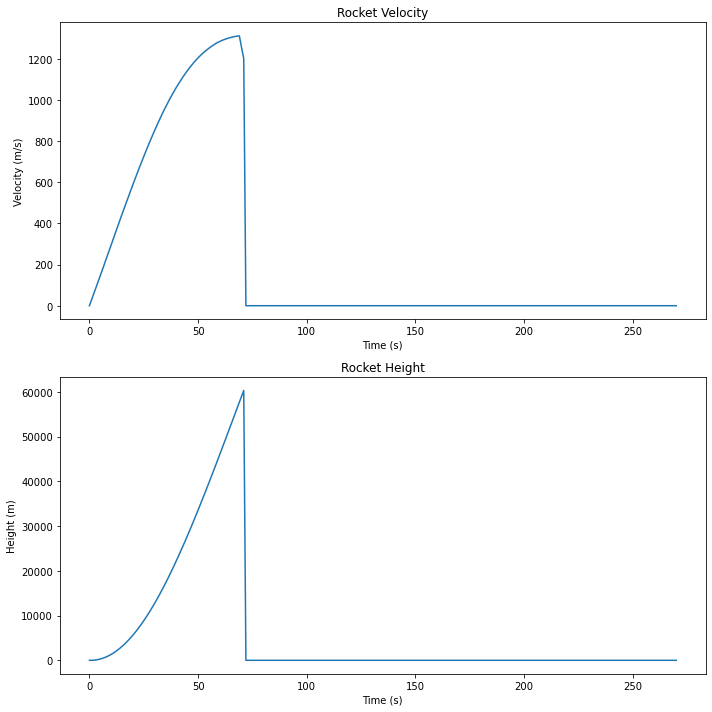

In [67]:
#Importing libraries:
import numpy as np
import matplotlib.pyplot as plt

# Global Variables:
g = 9.81           # gravitational acceleration, m/s^2
rho = 1.22         # density of air, kg/m^3
C = 0.125          # drag coefficient
d = 1.70           # rocket diameter, m
A = np.pi * d**2/4 # rocket cross-sectional area, m^2
ve = 2000          # ejection velocity, m/s
M = 13437          # total mass of rocket with fuel, kg (integer chosen was 56)
Mr = 4494          # mass of rocket without fuel, kg
dm_dt = -130       # fuel consumption rate, kg/s

# Setting time interval
dt = 1       # time step size
t_max = 10000       # maximum simulation time

# Initialize arrays
t = np.arange(0, t_max, dt)
h = np.zeros_like(t)
v = np.zeros_like(t)
m = np.zeros_like(t)

# Set initial conditions
h[0] = 0
v[0] = 0
m[0] = M

# Simulation loop
stage = 1 #Initial instance when the rocket hasn't gained velocity or height
for i in range(1, len(t)):
    # Calculate forces
    Fg = m[i-1] * g
    Fdrag = 1/2 * rho * v[i-1]**2 * C * A
    if m[i-1] > Mr:
        Fthrust = ve * dm_dt
        dm = dm_dt * dt
        m[i] = m[i-1] + dm
    else:
        Fthrust = 0
        m[i] = m[i-1]

    # Update velocity and height using Euler method
    a = (Fthrust - Fg + Fdrag) / m[i]
    v[i] = v[i-1] + a * dt
    h[i] = h[i-1] + v[i-1] * dt

    # Check for stage transition
    if stage == 1 and m[i] <= Mr:
        stage = 2
        print('Stage 2: Mass reducing along with fuel')
    elif stage == 2 and v[i] <= 0:
        stage = 3
        print('Stage 3: Free fall')
    elif stage == 3 and h[i] <= 0:
        stage = 4
        print('Stage 4: Landing')
        break

# Plot results
fig, ax = plt.subplots(2, 1, figsize=(10, 10))

# Velocity plot
ax[0].plot(t[:i+200],-1*v[:i+200])
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Velocity (m/s)')
ax[0].set_title('Rocket Velocity')


# Height plot
ax[1].plot(t[:i+200], -1*h[:i+200])
ax[1].set_xlabel('Time (s)')
ax[1].set_ylabel('Height (m)')
ax[1].set_title('Rocket Height')


plt.tight_layout()
plt.show()

In [68]:
#From the above plots we find that the max velocity of the rocket is 1300 m/s 
#and the max height it reaches before falling is around 60000 metres. the terminal velocity is close to 1100m/s and it takes
# about 70 seconds to achieve it.


Stage 2: Mass reducing along with fuel
Stage 3: Free fall
Stage 4: Landing


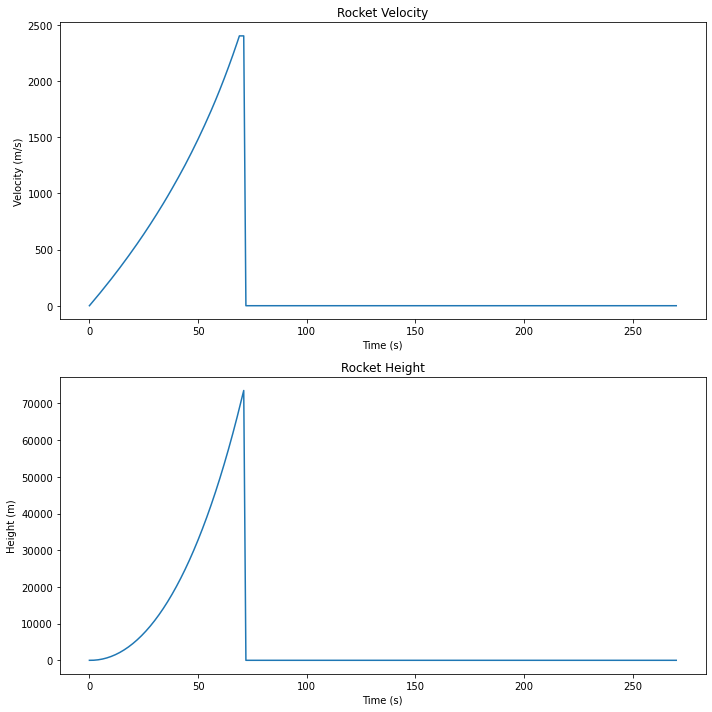

In [69]:
#Now let us replicate the same simulation for the conditions of Mars:
#Importing libraries:
import numpy as np
import matplotlib.pyplot as plt

# Global Variables:
g = 3.72           # gravitational acceleration, m/s^2
rho = 0.02         # density of air in Mars, kg/m^3
C = 0.125          # drag coefficient
d = 1.70           # rocket diameter, m
A = np.pi * d**2/4 # rocket cross-sectional area, m^2
ve = 2000          # ejection velocity, m/s
M = 13437          # total mass of rocket with fuel, kg (integer chosen was 56)
Mr = 4494          # mass of rocket without fuel, kg
dm_dt = -130       # fuel consumption rate, kg/s

# Setting time interval
dt = 1       # time step size
t_max = 10000       # maximum simulation time

# Initialize arrays
t = np.arange(0, t_max, dt)
h = np.zeros_like(t)
v = np.zeros_like(t)
m = np.zeros_like(t)

# Set initial conditions
h[0] = 0
v[0] = 0
m[0] = M

# Simulation loop
stage = 1
for i in range(1, len(t)):
    # Calculate forces
    Fg = m[i-1] * g
    Fdrag = 1/2 * rho * v[i-1]**2 * C * A
    if m[i-1] > Mr:
        Fthrust = ve * dm_dt
        dm = dm_dt * dt
        m[i] = m[i-1] + dm
    else:
        Fthrust = 0
        m[i] = m[i-1]

    # Update velocity and height using Euler method
    a = (Fthrust - Fg + Fdrag) / m[i]
    v[i] = v[i-1] + a * dt
    h[i] = h[i-1] + v[i-1] * dt

    # Check for stage transition
    if stage == 1 and m[i] <= Mr:
        stage = 2
        print('Stage 2: Mass reducing along with fuel')
    elif stage == 2 and v[i] <= 0:
        stage = 3
        print('Stage 3: Free fall')
    elif stage == 3 and h[i] <= 0:
        stage = 4
        print('Stage 4: Landing')
        break

# Plot results
fig, ax = plt.subplots(2, 1, figsize=(10, 10))

# Velocity plot
ax[0].plot(t[:i+200],-1*v[:i+200])
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Velocity (m/s)')
ax[0].set_title('Rocket Velocity')


# Height plot
ax[1].plot(t[:i+200], -1*h[:i+200])
ax[1].set_xlabel('Time (s)')
ax[1].set_ylabel('Height (m)')
ax[1].set_title('Rocket Height')


plt.tight_layout()
plt.show()


In [49]:
#We can observe that the Max velocity gets a significant increase, close to 2500m/s.
#The max height achieved also witnesses an increase of 10,000m. the terminal velocity id close to 2500 m/s and it takes 70s to achieve it.